In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Cargar el conjunto de datos seleccionado desde la carpeta Data
data = pd.read_csv('../Data/selected_happiness_data.csv')

# Definir las características (X) y la variable objetivo (y) usando las variables seleccionadas
X = data[["Economy (GDP per Capita)", "Social support", "Health (Life Expectancy)", 
          "Freedom", "Perceptions of corruption", "Economy_SocialSupport", 
          "Economy_Health", "Health_Squared", "Freedom_Squared"]]
y = data["Happiness Score"]

# Dividir los datos en conjuntos de entrenamiento y prueba (70% - 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 0.3135628288210797
Mean Absolute Error (MAE): 0.43840485563972764
R-squared (R2): 0.7488868120083692


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset limpio desde la carpeta Data
data = pd.read_csv('../Data/selected_happiness_data.csv')

# Eliminar filas con valores faltantes
data_clean = data.dropna()

# Definir las características (X) y la variable objetivo (y)
# Definir las características (X) y la variable objetivo (y)
X = data_clean[["Economy (GDP per Capita)", "Social support", "Health (Life Expectancy)", 
                "Freedom", "Perceptions of corruption", "Economy_SocialSupport", "Health_Freedom", 
                "Economy_Health", "Log_Economy", "Health_Squared", "Freedom_Squared", 
                "Continent_Africa", "Continent_Asia", "Continent_Europe", 
                "Continent_North America", "Continent_Oceania", "Continent_South America"]]
y = data_clean["Happiness Score"]

# Dividir los datos en conjuntos de entrenamiento y prueba (70% - 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error

# Calcular MAE además de MSE y R²
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.39356145683512783
Mean Squared Error (MSE): 0.26061710500981067
R-squared (R2): 0.7912877864694032


In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir los modelos que vamos a probar
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "SVR": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Entrenar y evaluar cada modelo
results = {}

for model_name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Realizar predicciones
    y_pred = model.predict(X_test)
    
    # Calcular métricas de evaluación
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Guardar resultados
    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "R2": r2
    }

# Mostrar los resultados de cada modelo
for model_name, metrics in results.items():
    print(f"Resultados para {model_name}:")
    print(f"  Mean Absolute Error (MAE): {metrics['MAE']}")
    print(f"  Mean Squared Error (MSE): {metrics['MSE']}")
    print(f"  R-squared (R2): {metrics['R2']}")
    print("\n")


Resultados para Linear Regression:
  Mean Absolute Error (MAE): 0.39356145683512783
  Mean Squared Error (MSE): 0.26061710500981067
  R-squared (R2): 0.7912877864694032


Resultados para Decision Tree:
  Mean Absolute Error (MAE): 0.43272764756222987
  Mean Squared Error (MSE): 0.3485650003518695
  R-squared (R2): 0.7208557251835279


Resultados para Random Forest:
  Mean Absolute Error (MAE): 0.33586191236945445
  Mean Squared Error (MSE): 0.19421009900551564
  R-squared (R2): 0.8444690740774222


Resultados para SVR:
  Mean Absolute Error (MAE): 0.36795694521894795
  Mean Squared Error (MSE): 0.23549737119342778
  R-squared (R2): 0.8114046366198155


Resultados para Gradient Boosting:
  Mean Absolute Error (MAE): 0.34841201118653875
  Mean Squared Error (MSE): 0.2073472410727901
  R-squared (R2): 0.833948344825121




- **Random Forest** es el modelo con mejor rendimiento, ya que logra el R² más alto y el menor MSE, capturando la mayor parte de la variabilidad en `Happiness Score`.
- **Gradient Boosting** es otra excelente opción si deseas explorar un modelo de boosting, ya que su rendimiento es cercano al de Random Forest.
- **Modelos lineales** (como Linear Regression y SVR) podrían ser opciones secundarias, útiles para interpretar relaciones, aunque no captan tan bien la complejidad como los modelos de ensemble.

In [36]:
import joblib

# Guardar el modelo entrenado en un archivo .pkl
joblib.dump(model, '../Model/random_forest_model.pkl')
print("Modelo guardado en '../Model/random_forest_model.pkl'")


Modelo guardado en '../Model/random_forest_model.pkl'


In [37]:
import joblib

# Cargar el modelo de Random Forest desde el archivo .pkl
loaded_model = joblib.load('../Model/random_forest_model.pkl')

# Realizar predicciones usando el modelo cargado en el conjunto de prueba X_test
y_pred_loaded = loaded_model.predict(X_test)

# Mostrar las primeras 10 predicciones como ejemplo
print("Primeras 10 predicciones del modelo cargado:", y_pred_loaded[:10])


Primeras 10 predicciones del modelo cargado: [4.34535053 4.71103635 4.77796198 6.39687554 7.12841118 5.62421558
 5.05582651 5.70531665 4.77672286 4.51829442]


C:\Users\HP\AppData\Local\Temp\ipykernel_11160\2963652342.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


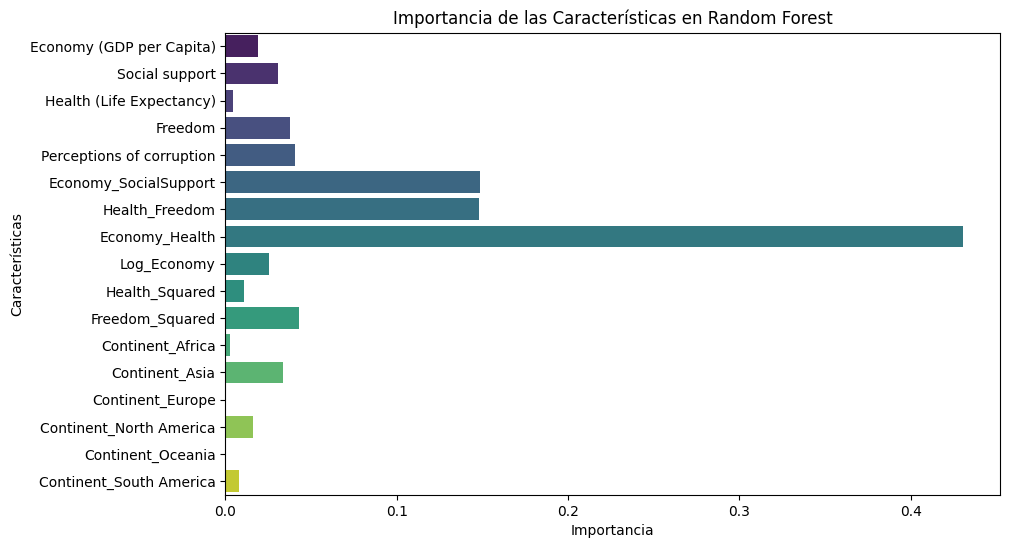

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Importancia de las Características
plt.figure(figsize=(10, 6))
importances = model.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Importancia de las Características en Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()

La gráfica de importancia de características en el modelo de **Random Forest** muestra que la variable **Economy_Health** (producto entre economía y salud) es la más influyente en la predicción del `Happiness Score`, seguida de **Health_Freedom** y **Economy_SocialSupport**. Estas interacciones sugieren que el bienestar económico combinado con el soporte social y la libertad tienen un gran impacto en la felicidad. Las variables de continente también tienen cierta influencia, aunque menos significativa que las interacciones mencionadas.

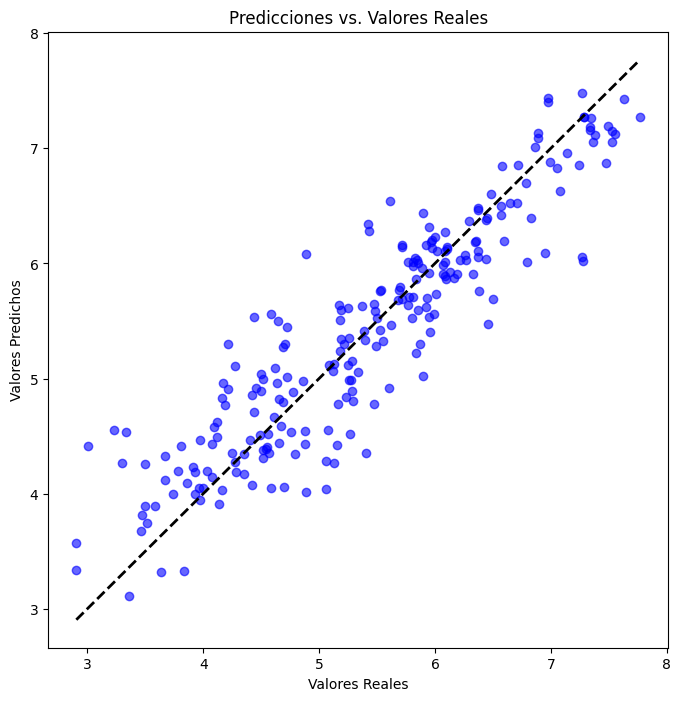

In [39]:
# 2. Gráfica de Predicciones vs. Valores Reales
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Predicciones vs. Valores Reales")
plt.show()

La gráfica de **Predicciones vs. Valores Reales** muestra que las predicciones del modelo de **Random Forest** se alinean bien con los valores reales de `Happiness Score`. La mayoría de los puntos están cerca de la línea diagonal, lo que indica una buena precisión en las predicciones. Aunque hay cierta dispersión, especialmente en los extremos, el modelo en general logra capturar la tendencia de los datos reales de manera efectiva.

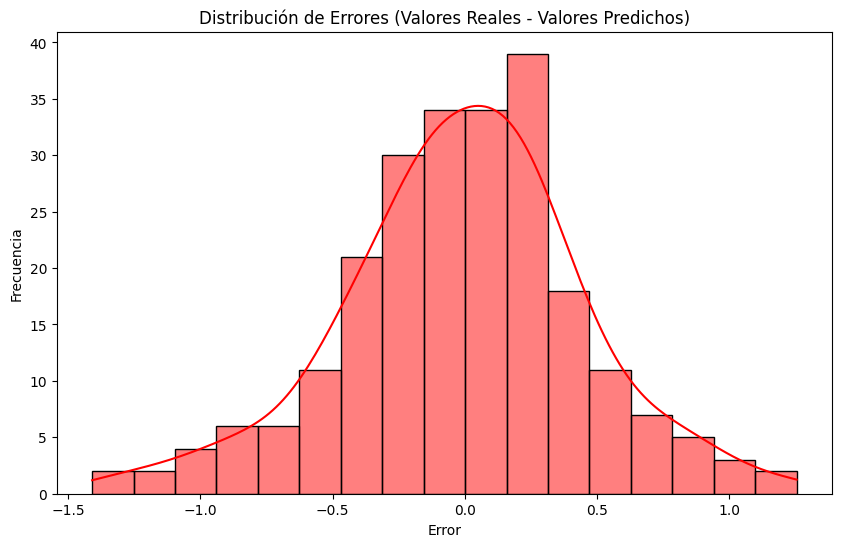

In [40]:
# 3. Distribución de Errores
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color="red")
plt.title("Distribución de Errores (Valores Reales - Valores Predichos)")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.show()

La **Distribución de Errores** muestra la diferencia entre los valores reales y los valores predichos por el modelo de **Random Forest**. La distribución es aproximadamente simétrica y está centrada cerca de cero, lo que indica que los errores están equilibrados en ambas direcciones, sin un sesgo evidente. La forma de campana sugiere que los errores siguen una distribución normal, lo cual es deseable en un modelo bien ajustado, ya que implica que no hay grandes desviaciones en las predicciones.
